## Problem 2.24

In [165]:
# TODO: Add your imports
import random
import numpy as np
import matplotlib.pyplot as plt



### 2.24 (B)

In [166]:
def quadratic_target_function(x):
    # TODO: implement target function
    return x**2

In [167]:
def random_data_sample(target_function):
    '''
    Generate a random data sample (x, y) where x is a random number in the range [-1, 1]

    Returns:
    x: random number in the range [-1, 1]
    y: target function value at x
    '''
    # Generate random number in the range [0, 1]
    random_number = random.random()

    # Scale and shift the random numbers to fit the interval [-1, 1]
    x = 2 * random_number - 1
    return x, target_function(x)

def generate_data_set(target_function,n=2):
    '''
    Generate n random data samples

    returns:
    D: list of n data samples [(x1,y1),(x2,y2),....(xn,yn)]
    '''
    # Generate Data Set (D): 2 data samples
    D = [random_data_sample(target_function) for _ in range(n)]

    return D  # [(x1,y1),(x2,y2),....(xn,yn)]


def generate_data_set_space(target_function,n=2,D_no=100):
    '''
    Generate D_no number of data sets of n data samples each

    returns:
    D_space: list of D_no data sets
    '''
    D_space = [generate_data_set(target_function,n) for _ in range(D_no)]

    return D_space  # [[(x1,y1),(x2,y2),....(xn,yn)],[...],....[...]]

#### Experiment For Quadratic Hypothesis Set 

In [168]:
def find_line_equation(point1, point2):
    '''
    Find the line equation given two points

    Args:
    point1: tuple (x1, y1)
    point2: tuple (x2, y2)

    Returns:
    a: slope of the line
    b: intercept of the line
    '''
    x1, y1 = point1
    x2, y2 = point2
    
    # Calculate the slope (a)
    a = (y2 - y1) / (x2 - x1)
    
    # Calculate the intercept (b)
    b = y1 - a * x1
    
    return a, b

# Function to compute y=ax+b
def compute_st_lne_eq(a,b,x):
    '''
    Compute the value of y for a given x using the equation y = a*x + b

    Args:
    a: slope of the line
    b: intercept of the line
    x: input value

    Returns:
    y: output value
    '''
    return a*x+b


def run_numerical_experiment(training_data_set_space,testing_data_set):
    '''
    Args:
    training_data_set_space : List of Data Sets D:  [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]
    testing_data_set : Data Set D: [(x1,y1),(x2,y2),....,(xn,yn)]
    
    Returns:
    Eout : Expectation of the out of sample error over all hypothesis learned over the DataSet Space ED[Eout(g(D))] = ED[Ex [(g(D)(x) - f(x))^2]]
    g_bar : Average Hypothesis over the DataSet Space g_bar(x) = ED(g(D))
    bias : Bias Ex[(g_bar(x) - f(x))^2]
    '''
    #  Testing DataSet Space
    x=np.array([x for x,_ in testing_data_set])
    y_true=np.array([y for _,y in testing_data_set])

    # Initializes
    Eout=0
    g_bar_a,g_bar_b=0,0
    g_D=[] # List to store the hypothesis learned from each data set[Dk]

    for D in training_data_set_space:        
        # From Each Data Set D in the Training DataSet Space, Learn the hypothesis g(D)
        point_1,point_2=D[0],D[1]

        # Learn Function g(D) from the Data Set D [Training Data Set]
        g_D_a,g_D_b = find_line_equation(point_1,point_2)
        #  Save Learned Hypothesis g(D) from the Data Set D
        g_D.append((g_D_a,g_D_b))

        # 1. Compute the out of sample error E_out on model g(D)
        # Get y_pred for Testing DataSet from the learned hypothesis g(D)
        y_pred=compute_st_lne_eq(a=g_D_a,b=g_D_b,x=x)

        # Eout(g(D)) = Ex[(g(D)(x) - f(x))^2]
        error=np.sum((y_pred-y_true)**2)/len(y_true)
        Eout+=error

        # 2. Compute g_bar(x) from the Data Set Space
        g_bar_a+=g_D_a
        g_bar_b+=g_D_b

    # Compute the expectation of the out of sample error over all hypothesis learned over the DataSet Space
    # ED(Eout(g(D))) = ED[Ex [(g(D)(x) - f(x))^2]]
    Eout=Eout/len(training_data_set_space)

    # Compute the average hypothesis g_bar(x) over all hypothesis learned over the DataSet Space
    # g_bar(x)=ED(g(D)) :D
    g_bar_a=g_bar_a/len(training_data_set_space)
    g_bar_b=g_bar_b/len(training_data_set_space)
    g_bar= (g_bar_a,g_bar_b)

    # 3. compute the bias :D
    # bias = Ex[(g_bar(x) - f(x))^2]
    y_pred_g_bar=compute_st_lne_eq(a=g_bar_a,b=g_bar_b,x=x)
    bias=np.sum((y_pred_g_bar-y_true)**2)/len(y_true)
    
    # 4. Compute the variance :D
    # variance = Ex[ED[(g(D)(x) - g_bar(x))^2]]
    # variance = ED[EX[(g(D)(x) - g_bar(x))^2]]
    variance=0
    for i,D in enumerate(training_data_set_space):
        # Model g(D) from the Data Set D
        g_D_a,g_D_b=g_D[i]
        # Predictions on test Set
        y_pred=compute_st_lne_eq(a=g_D_a,b=g_D_b,x=x)

        y_bar=compute_st_lne_eq(a=g_bar_a,b=g_bar_b,x=x)
        variance+=np.sum((y_pred-y_bar)**2)/len(y_bar) #EX[(g(D)(x) - g_bar(x))^2]

    # Expectation on D Ex[ED[(g(D)(x) - g_bar(x))^2]]
    variance=variance/len(training_data_set_space)


    # For illustration Draw g(D) and g_bar :D
    x = np.linspace(-10, 10, 100) 
    for i,D in enumerate(training_data_set_space):
        # Model g(D) from the Data Set D
        g_D_a,g_D_b=g_D[i]
        y = compute_st_lne_eq(a=g_D_a,b=g_D_b,x=x)
        plt.plot(x, y,color="blue")

    # Plot the average hypothesis g_bar(x) over all hypothesis learned over the DataSet Space
    y = compute_st_lne_eq(a=g_bar_a,b=g_bar_b,x=x)
    plt.plot(x, y,color="red",label="g_bar")

    plt.title(f"Hypothesis Learned from {len(training_data_set_space)} Data Sets different")
    plt.legend()
    plt.show()

    return Eout,g_bar,bias,variance

### 2.24 (C)

In [169]:
result_straight_line_hyp={"2":{}}

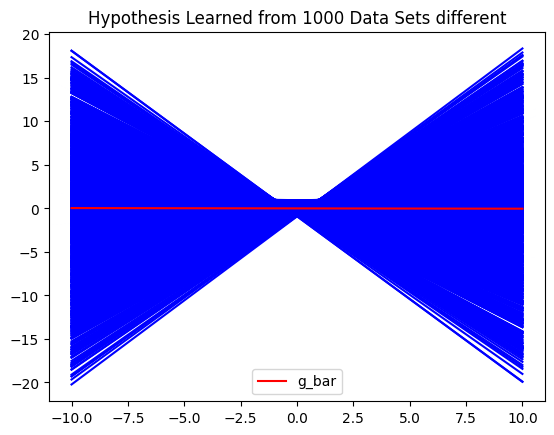

g_bar (-0.003608217313985319, -0.0009620005559311156)
Eout 0.46727685161227434
bias 0.1611787002074618
variance 0.3060981514048124


 Eout= bias + variance 😮


In [170]:
# TODO: Run experiment and calculate bias and variance (+ plotting)

# Training Data set Space each data set has 2 data samples  [Final Training is Done on one data set only ]
training_data_set_space=generate_data_set_space(target_function=quadratic_target_function,n=2,D_no=1000)  # [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]

# Testing Data set with n data samples
testing_data_set=generate_data_set_space(target_function=quadratic_target_function ,n=100,D_no=1)[0]  # [(x1,y1),(x2,y2),....(xn,yn)]

# Running Experiment with straight line as hypothesis set
Eout,g_bar,bias,variance=run_numerical_experiment(training_data_set_space=training_data_set_space,testing_data_set=testing_data_set)

print("g_bar",g_bar)
print("Eout",Eout)
print("bias",bias)
print("variance",variance)

assert Eout-bias-variance<1e-10
print("\n\n Eout= bias + variance 😮")



# Add to Results for preview
result_straight_line_hyp["2"]={"g_bar":g_bar,"Eout":Eout,"bias":bias,"variance":variance}




#### Eout = Bias+ Variance 🙂 The lecture Main Objective

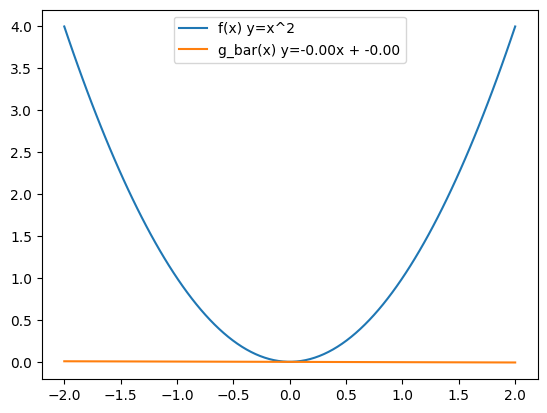

In [171]:
# Plotting
x = np.linspace(-2, 2, 100) 
# 1. f(x)
f_x=quadratic_target_function(x)
plt.plot(x,f_x,label=f'f(x) y=x^2')
# 2. g_bar(x)
g_bar_y=compute_st_lne_eq(a=g_bar[0],b=g_bar[1],x=x)
# plt.plot(x,g_bar_y,label=f'g_bar(x) y={g_bar[0]}x+{g_bar[1]}')
plt.plot(x,g_bar_y,label=f'g_bar(x) y={g_bar[0]:.2f}x + {g_bar[1]:.2f}')

plt.legend()
plt.show()



#### Note 📝: g_bar makes perfect sense to be this line because always 2 points take for g_D are straight line of 2 points on the parabola  Show in Graph Above :D

### 2.24 (E)

In [172]:
# Function to compute y=np.mean(x)
def compute_avg(x):
    '''
    Compute the value of y for a given x using the equation y = a*x + b

    Args:
    a: slope of the line
    b: intercept of the line
    x: input value

    Returns:
    y: output value
    '''
    return np.mean(x)

In [173]:
def run_numerical_experiment_constant_hypoth(training_data_set_space,testing_data_set):
    '''
    Args:
    training_data_set_space : List of Data Sets D:  [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]
    testing_data_set : Data Set D:  [(x1,y1),(x2,y2),....(xn,yn)]
    
    Returns:
    Eout : Expectation of the out of sample error over all hypothesis learned over the DataSet Space ED[Eout(g(D))] = ED[Ex [(g(D)(x) - f(x))^2]]
    g_bar : Average Hypothesis over the DataSet Space g_bar(x) = ED(g(D))
    bias : Bias Ex[(g_bar(x) - f(x))^2]
    '''


    #  Testing DataSet Space
    x=np.array([x for x,_ in testing_data_set])
    y_true=np.array([y for _,y in testing_data_set])

    # print(x)
    # print(y_true)

    
    # Initializes
    Eout=0
    g_bar_c=0
    g_D=[] # List to store the hypothesis learned from each data set[Dk]


    for D in training_data_set_space:        
        # From Each Data Set D in the Training DataSet Space, Learn the hypothesis g(D)
        # Training Data Set [Points]
        # This Depends on the No of points in the Data
        points=D

        # Learn Function g(D) from the Data Set D [Training Data Set]
        g_D_c=compute_avg([point[1] for point in points])

        #  Save Learned Hypothesis g(D) from the Data Set D
        g_D.append((g_D_c))

        # 1. Compute the out of sample error E_out on model g(D)
        # Get y_pred for Testing DataSet from the learned hypothesis g(D)
        y_pred=g_D_c  # Model is Constant :D

        # Eout(g(D)) = Ex[(g(D)(x) - f(x))^2]
        error=np.sum((y_pred-y_true)**2)/len(y_true)
        Eout+=error

        # 2. Compute g_bar(x) from the Data Set Space
        g_bar_c+=g_D_c


    # Compute the expectation of the out of sample error over all hypothesis learned over the DataSet Space
    # ED(Eout(g(D))) = ED[Ex [(g(D)(x) - f(x))^2]]
    Eout=Eout/len(training_data_set_space)


    
    # Compute the average hypothesis g_bar(x) over all hypothesis learned over the DataSet Space
    # g_bar(x)=ED(g(D)) :D
    g_bar_c=g_bar_c/len(training_data_set_space)
    g_bar= g_bar_c

    
    # 3. compute the bias :D
    # bias = Ex[(g_bar(x) - f(x))^2]
    y_pred_g_bar=g_bar_c
    bias=np.sum((y_pred_g_bar-y_true)**2)/len(y_true)

    # 4. Compute the variance :D
    # variance = Ex[ED[(g(D)(x) - g_bar(x))^2]]
    # variance = ED[EX[(g(D)(x) - g_bar(x))^2]]
    variance=0
    for i,D in enumerate(training_data_set_space):
        # Model g(D) from the Data Set D
        g_D_c=g_D[i]

        # Predictions on test Set
        y_pred=g_D_c

        y_bar=g_bar
        # variance+=np.sum((y_pred-y_bar)**2)/len(y_pred) #EX[(g(D)(x) - g_bar(x))^2]
        variance+=(y_pred-y_bar)**2#EX[(g(D)(x) - g_bar(x))^2]
    
    # Expectation on D Ex[ED[(g(D)(x) - g_bar(x))^2]]
    variance=variance/len(training_data_set_space)


    
    # For illustration Draw g(D) and g_bar :D
    _ = np.linspace(-10, 10, 100) 
    for i,D in enumerate(training_data_set_space):
        # Model g(D) from the Data Set D
        g_D_c=g_D[i]
        y = g_D_c
        plt.axhline(y=y, color='blue')
    
    # Plot the average hypothesis g_bar(x) over all hypothesis learned over the DataSet Space
    y = g_bar_c
    plt.axhline(y=y, color='red',label=f"g_bar y={g_bar_c:.2f}")

    plt.title(f"Hypothesis Learned from {len(training_data_set_space)} Data Sets different ,with {len(training_data_set_space[0])} input Data points")
    plt.legend()
    plt.show()





    # # return Eout,g_bar,bias,variance
    return Eout,g_bar,bias,variance




### With 2️⃣ Input Data Points

In [174]:
result_constant_hyp={"2":{},"5":{},"10":{},"20":{}}

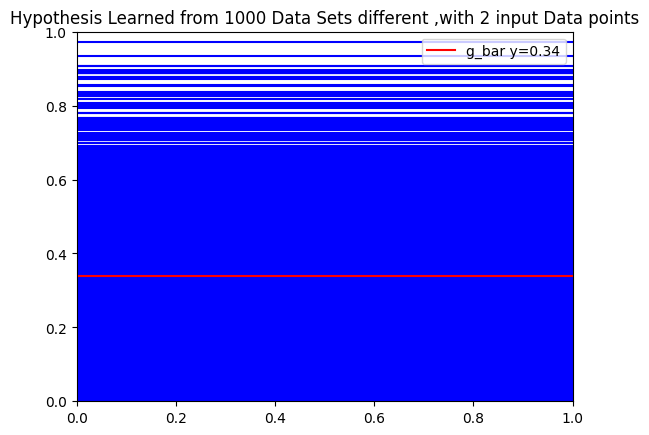

g_bar 0.339684139155049
Eout 0.14550057818792997
bias 0.10167736048477029
variance 0.0438232177031597


 Eout= bias + variance 😮


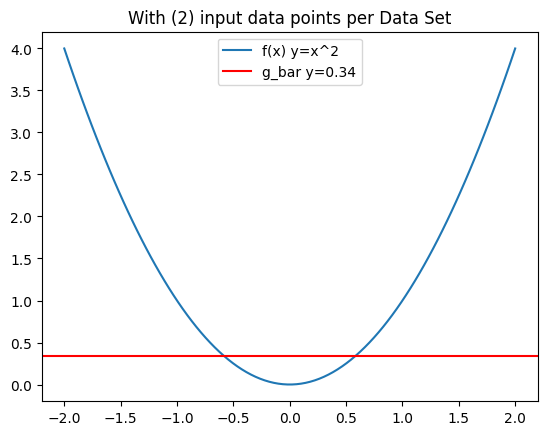

In [175]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
N=2 

# Training Data set Space each data set has 2 data samples  [Final Training is Done on one data set only ]
training_data_set_space=generate_data_set_space(target_function=quadratic_target_function,n=N,D_no=1000)  # [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]

# Testing Data set with n data samples
testing_data_set=generate_data_set_space(target_function=quadratic_target_function ,n=100,D_no=1)[0]  # [(x1,y1),(x2,y2),....(xn,yn)]


Eout,g_bar,bias,variance= run_numerical_experiment_constant_hypoth(training_data_set_space=training_data_set_space,testing_data_set=testing_data_set)

print("g_bar",g_bar)
print("Eout",Eout)
print("bias",bias)
print("variance",variance)

assert Eout-bias-variance<1e-10
print("\n\n Eout= bias + variance 😮")

# Add to Results for preview
result_constant_hyp["2"]={"g_bar":g_bar,"Eout":Eout,"bias":bias,"variance":variance}


# Plotting
x = np.linspace(-2, 2, 100) 
# 1. f(x)
f_x=quadratic_target_function(x)
plt.plot(x,f_x,label=f'f(x) y=x^2')
# 2. g_bar(x)
plt.axhline(y=g_bar, color='red',label=f"g_bar y={g_bar:.2f}")


plt.title("With (2) input data points per Data Set")
plt.legend()
plt.show()

### With 5️⃣ Input Data Points

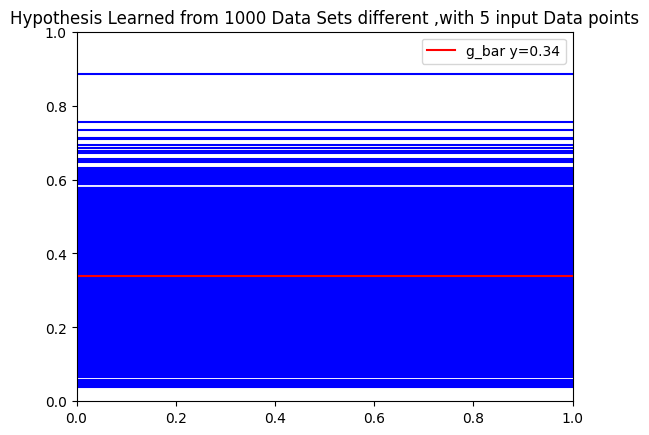

g_bar 0.3377849757860807
Eout 0.10676338106787826
bias 0.08965277700529177
variance 0.017110604062586413


 Eout= bias + variance 😮


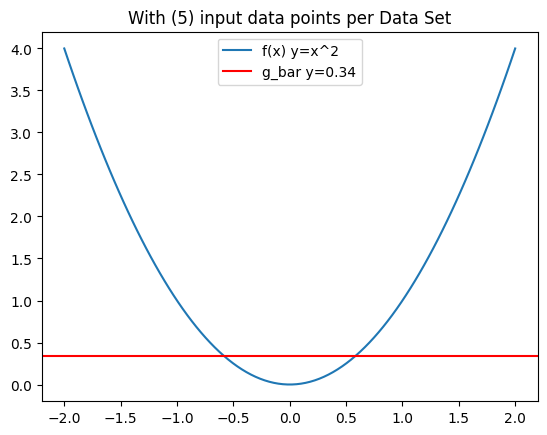

In [176]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
N=5 

# Training Data set Space each data set has 2 data samples  [Final Training is Done on one data set only ]
training_data_set_space=generate_data_set_space(target_function=quadratic_target_function,n=N,D_no=1000)  # [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]

# Testing Data set with n data samples
testing_data_set=generate_data_set_space(target_function=quadratic_target_function ,n=100,D_no=1)[0]  # [(x1,y1),(x2,y2),....(xn,yn)]


Eout,g_bar,bias,variance= run_numerical_experiment_constant_hypoth(training_data_set_space=training_data_set_space,testing_data_set=testing_data_set)

print("g_bar",g_bar)
print("Eout",Eout)
print("bias",bias)
print("variance",variance)

assert Eout-bias-variance<1e-10
print("\n\n Eout= bias + variance 😮")


# Add to Results for preview
result_constant_hyp["5"]={"g_bar":g_bar,"Eout":Eout,"bias":bias,"variance":variance}


# Plotting
x = np.linspace(-2, 2, 100) 
# 1. f(x)
f_x=quadratic_target_function(x)
plt.plot(x,f_x,label=f'f(x) y=x^2')
# 2. g_bar(x)
plt.axhline(y=g_bar, color='red',label=f"g_bar y={g_bar:.2f}")


plt.title("With (5) input data points per Data Set")
plt.legend()
plt.show()

### With 🔟 Input Data Points

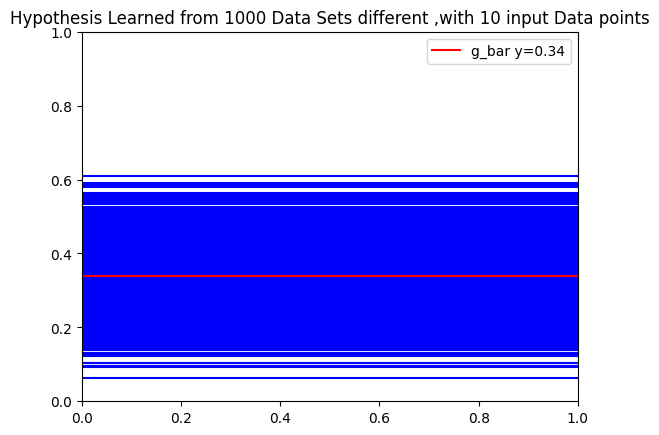

g_bar 0.33833073579006606
Eout 0.10807380460066095
bias 0.09924372212956696
variance 0.008830082471094085


 Eout= bias + variance 😮


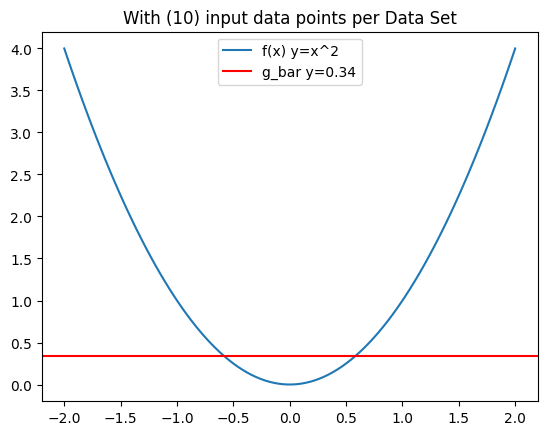

In [177]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
N=10

# Training Data set Space each data set has 2 data samples  [Final Training is Done on one data set only ]
training_data_set_space=generate_data_set_space(target_function=quadratic_target_function,n=N,D_no=1000)  # [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]

# Testing Data set with n data samples
testing_data_set=generate_data_set_space(target_function=quadratic_target_function ,n=100,D_no=1)[0]  # [(x1,y1),(x2,y2),....(xn,yn)]


Eout,g_bar,bias,variance= run_numerical_experiment_constant_hypoth(training_data_set_space=training_data_set_space,testing_data_set=testing_data_set)

print("g_bar",g_bar)
print("Eout",Eout)
print("bias",bias)
print("variance",variance)

assert Eout-bias-variance<1e-10
print("\n\n Eout= bias + variance 😮")


# Add to Results for preview
result_constant_hyp[N]={"g_bar":g_bar,"Eout":Eout,"bias":bias,"variance":variance}


# Plotting
x = np.linspace(-2, 2, 100) 
# 1. f(x)
f_x=quadratic_target_function(x)
plt.plot(x,f_x,label=f'f(x) y=x^2')
# 2. g_bar(x)
plt.axhline(y=g_bar, color='red',label=f"g_bar y={g_bar:.2f}")


plt.title("With (10) input data points per Data Set")
plt.legend()
plt.show()

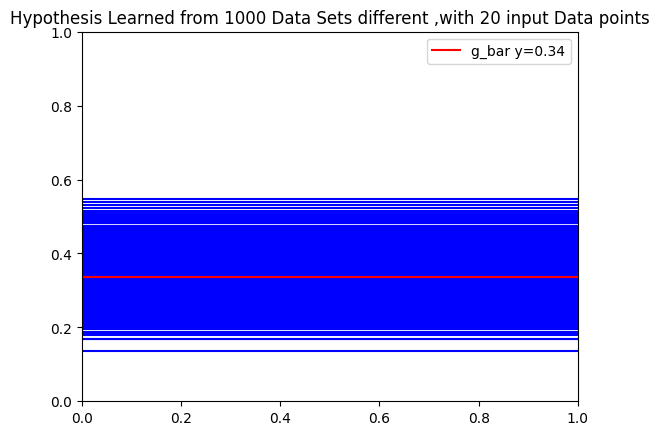

g_bar 0.3367749899390508
Eout 0.09533534228337734
bias 0.0911155040216049
variance 0.0042198382617724736


 Eout= bias + variance 😮


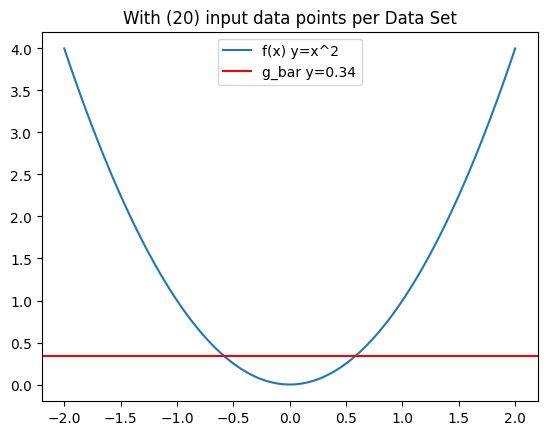

In [178]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
N=20

# Training Data set Space each data set has 2 data samples  [Final Training is Done on one data set only ]
training_data_set_space=generate_data_set_space(target_function=quadratic_target_function,n=N,D_no=1000)  # [[(x1,y1),(x2,y2)],[(x1,y1),(x2,y2)],....,[(x1,y1),(x2,y2)]]

# Testing Data set with n data samples
testing_data_set=generate_data_set_space(target_function=quadratic_target_function ,n=100,D_no=1)[0]  # [(x1,y1),(x2,y2),....(xn,yn)]


Eout,g_bar,bias,variance= run_numerical_experiment_constant_hypoth(training_data_set_space=training_data_set_space,testing_data_set=testing_data_set)

print("g_bar",g_bar)
print("Eout",Eout)
print("bias",bias)
print("variance",variance)

assert Eout-bias-variance<1e-10
print("\n\n Eout= bias + variance 😮")


# Add to Results for preview
result_constant_hyp[N]={"g_bar":g_bar,"Eout":Eout,"bias":bias,"variance":variance}


# Plotting
x = np.linspace(-2, 2, 100) 
# 1. f(x)
f_x=quadratic_target_function(x)
plt.plot(x,f_x,label=f'f(x) y=x^2')
# 2. g_bar(x)
plt.axhline(y=g_bar, color='red',label=f"g_bar y={g_bar:.2f}")


plt.title("With (20) input data points per Data Set")
plt.legend()
plt.show()

###  Results

In [179]:
import pandas as pd

df = pd.DataFrame.from_dict(result_straight_line_hyp, orient='index')
df = df.reset_index()
df = df.rename(columns={'index': '# Data points'})

# Print the DataFrame
print("Straight Line Hypothesis Results")
print(df.to_markdown(index=False))


# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(result_constant_hyp, orient='index')
df = df.reset_index()
df = df.rename(columns={'index': '# Data points'})


# Print the DataFrame
print("Constant Hypothesis Results")
print(df.to_markdown(index=False))



Straight Line Hypothesis Results
|   # Data points | g_bar                                           |     Eout |     bias |   variance |
|----------------:|:------------------------------------------------|---------:|---------:|-----------:|
|               2 | (-0.003608217313985319, -0.0009620005559311156) | 0.467277 | 0.161179 |   0.306098 |
Constant Hypothesis Results
|   # Data points |    g_bar |      Eout |      bias |   variance |
|----------------:|---------:|----------:|----------:|-----------:|
|               2 | 0.339684 | 0.145501  | 0.101677  | 0.0438232  |
|               5 | 0.337785 | 0.106763  | 0.0896528 | 0.0171106  |
|              10 | 0.338331 | 0.108074  | 0.0992437 | 0.00883008 |
|              20 | 0.336775 | 0.0953353 | 0.0911155 | 0.00421984 |


### Comments Running Both Experiments it is clear that :

1. g_bar is nearly the sam in the 4 runs for experiment(2) 🤔  X is from uniform distributor [-1,1] so mean for its values is sample mean for the population mean for the uniform density function so we get it near  0.25 :D
2. Out of Sample error is generally smaller in case constant hypothesis than in case of st line hypothesis
3. The Variance Decrease in case of constant hypothesis as n of data points in the data set increase why?!  This is logical because as no of data points increase then estimating the mean of them is nearer to the g_bar for all constant hypothesis [Mean is Additive]   [Improvement is clear between the 4 runs for experiment (2) 🙂]
4. No great different between bias in the 4 runs for experiment (2) ? The input data is from [-1,1] uniform distribution then we see that g_bar for the 4 experiment is nearly the same 😎 so this is normal of course have near bias values